In [1]:
import os
from pathlib import Path
from IPython.display import clear_output


notebook_dir = "/home/balabaevvl/courses/project/FITS/src/"
os.chdir(notebook_dir)

GPUs = [
    "GPU-e83bd31b-fcb9-b8de-f617-2d717619413b",
    "GPU-5a9b7750-9f85-49a5-3aae-fe07b1b7661d",
    "GPU-fe2d8dfd-06f2-a5c4-a7fd-4a5f23947005",
    "GPU-0c320096-21ee-4060-8731-826ca2febfab",
    "GPU-baef952c-6609-aace-3b78-e4e07788d5de",
    "GPU-3979d65b-c238-4e9c-0c1c-1aa3f05c56a1",
    "GPU-6c76a2c5-5375-aa06-11d4-0fddfac30e91",
]
os.environ["CUDA_VISIBLE_DEVICES"] = f"{GPUs[1]}"

In [ ]:
from fits.data.download import DownloadDatasetAirQuality

DownloadDatasetAirQuality()

In [ ]:
import pandas as pd
from fits.config import DatasetsPaths

df = pd.read_csv(
    DatasetsPaths.pm25.value,
    index_col="datetime",
    parse_dates=True,
)

In [2]:
from fits.data.dataset import ModelMode, DatasetAirQuality

dataset = DatasetAirQuality(ModelMode.train)

for sample in dataset:
    break

sample

ForecastingData(observed_data=tensor([[ 0.9128,  0.3056,  0.3691,  ..., -0.0399,  0.1854, -0.0817],
        [ 0.7114,  0.2465,  0.5988,  ...,  0.0339,  0.3024, -0.0377],
        [ 0.7546,  0.2908,  0.7281,  ...,  0.1499,  0.5152,  0.0680],
        ...,
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000]]), observed_mask=tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), time_points=tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
        ...,
        [45., 45., 45.,  ..., 45., 45., 45.],
        [46., 46., 46.,  ..., 46., 46., 46.],
        [47

In [2]:
from fits.modelling.framework import Train
from fits.data.dataset import DatasetAirQuality
from fits.modelling.CSDI.adapter import CSDIAdapter
from fits.data.dataloader import ForecastingDataLoader

train_loader, valid_loader, test_loader = ForecastingDataLoader(
    DatasetAirQuality, batch_size=128
)

csdi = CSDIAdapter()

/home/balabaevvl/courses/venv311/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


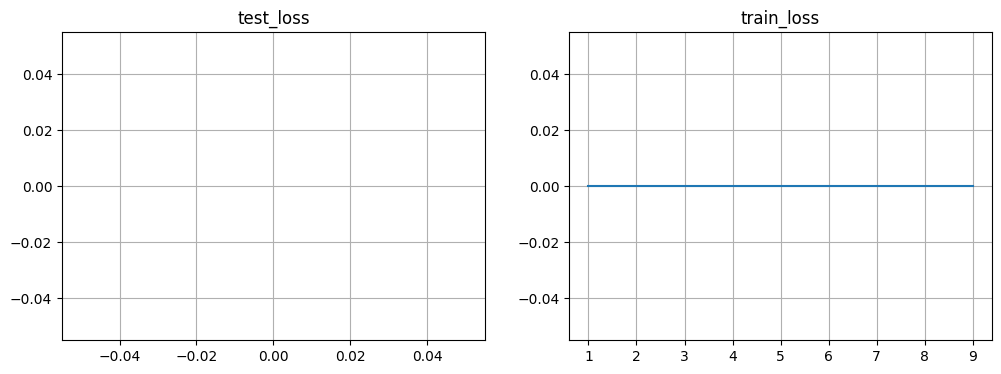

  0%|                                                                                                                                                                   | 0/11 [00:00<?, ?it/s]


TypeError: CSDIAdapter.forward() got an unexpected keyword argument 'is_train'

In [3]:
Train(csdi, train_loader, valid_loader)

In [ ]:
# TODO: data normalization